In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [4]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
x= iris_df.copy()

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(x)

C:\Users\999ra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\999ra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [11]:
x['cluster'] = kmeans.labels_
x['cluster']

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: cluster, Length: 150, dtype: int32

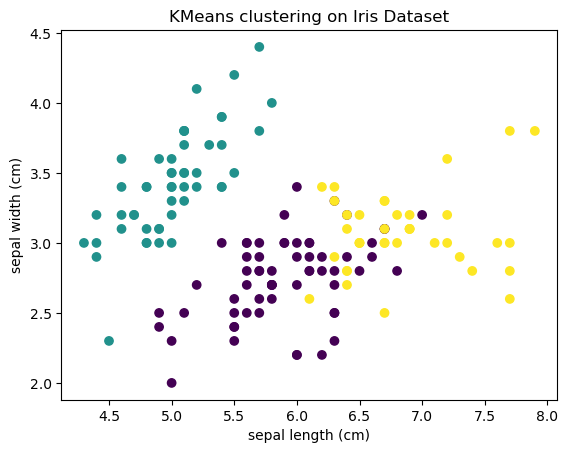

In [13]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=x['cluster'], cmap='viridis')
plt.title('KMeans clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [ ]:
#Description of KMeans Clustering
#KMeans is a centroid-based clustering algorithm that works by partitioning data into k distinct clusters. 
#It tries to minimize the distance between the points and their assigned cluster centroids. The steps involve:

#1. Randomly selecting k centroids.


#2. Assigning each data point to the nearest centroid.


#3. Updating the centroids based on the points assigned to each cluster.


#4. Repeating the process until the centroids do not change or a maximum number of iterations is reached.

#Why KMeans is suitable for Iris dataset
#KMeans is suitable for the Iris dataset because it's a simple, well-separated dataset. 
#There are three known classes (species), and KMeans can cluster based on the inherent patterns in the feature space
#without knowing the actual species labels. The continuous numeric features (sepal and petal lengths/widths) make KMeans 
#a good candidate for this dataset.


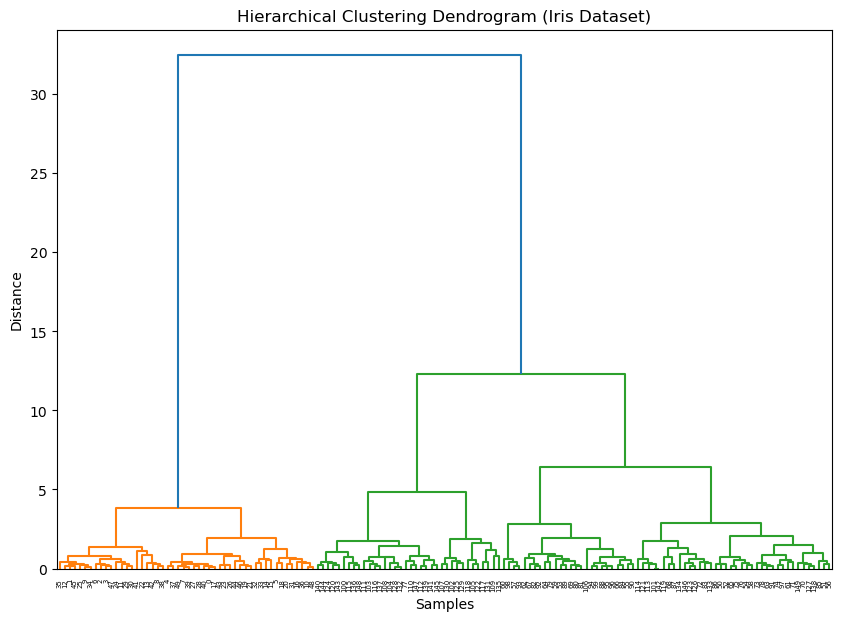

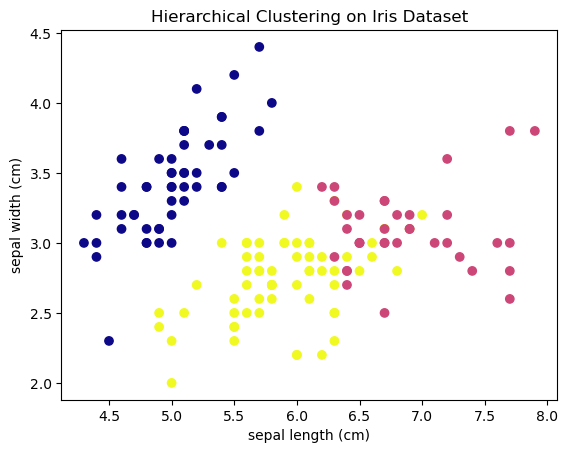

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Hierarchical Clustering
Z = linkage(x.iloc[:, :-1], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# To create clusters from hierarchical clustering (choose 3 clusters)
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram to form 3 clusters
x['h_cluster'] = fcluster(Z, 3, criterion='maxclust')

# Visualize the clusters (using only the first two features for easy visualization)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=x['h_cluster'], cmap='plasma')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [ ]:
#Description of Hierarchical Clustering
#Hierarchical clustering builds a hierarchy of clusters by either a bottom-up approach (agglomerative) or 
#a top-down approach (divisive). In agglomerative clustering, each point starts as its own cluster, and 
#the algorithm recursively merges the closest clusters until only a single cluster or the desired number of clusters remains. 
#The clustering process can be visualized using a dendrogram.

#Why Hierarchical Clustering is suitable for Iris dataset
#Hierarchical clustering can reveal the nested structure of the data, which is useful when the number of clusters is
#not known a priori. It allows us to observe how the clusters merge at different levels, which could provide insights into 
#the relationships between different species in the Iris dataset.